<a href="https://colab.research.google.com/github/Vishnu75678/R-D-INFRO-TECHNOLOGY/blob/main/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-n

<ipython-input-1-6d1802dce850>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)
<ipython-input-1-6d1802dce850>:28: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[col] = data[col].replace({'Yes': 1, 'No': 0})


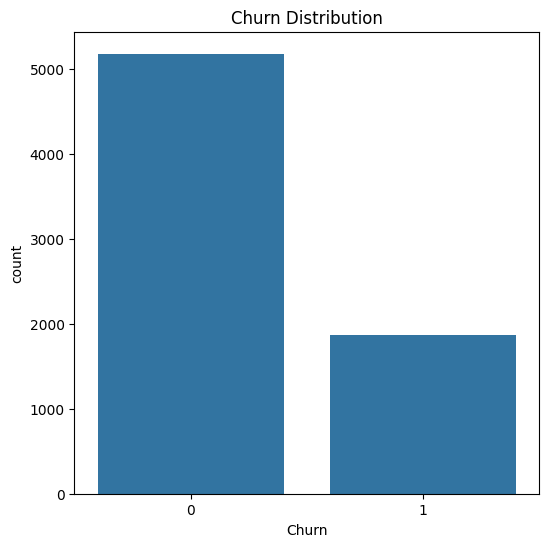

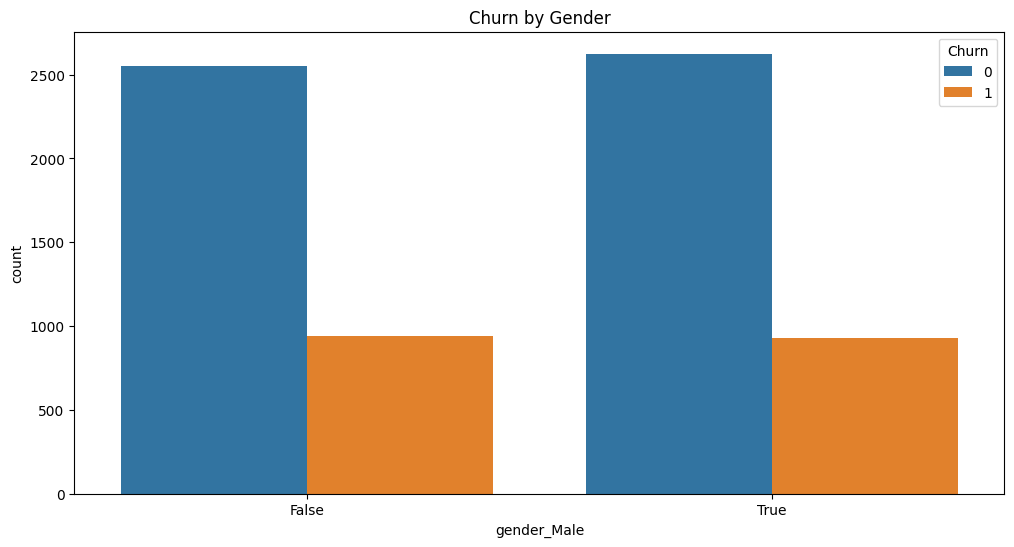

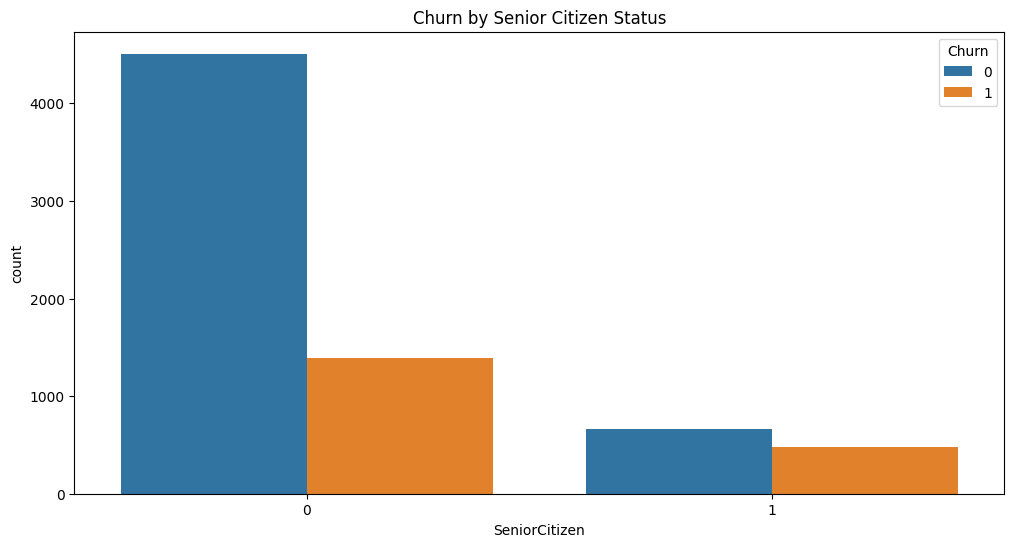

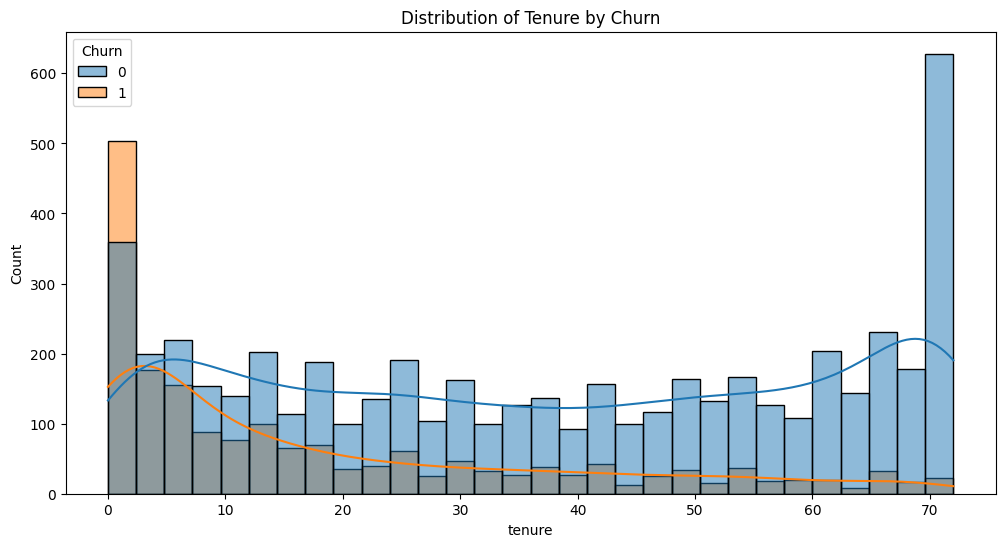

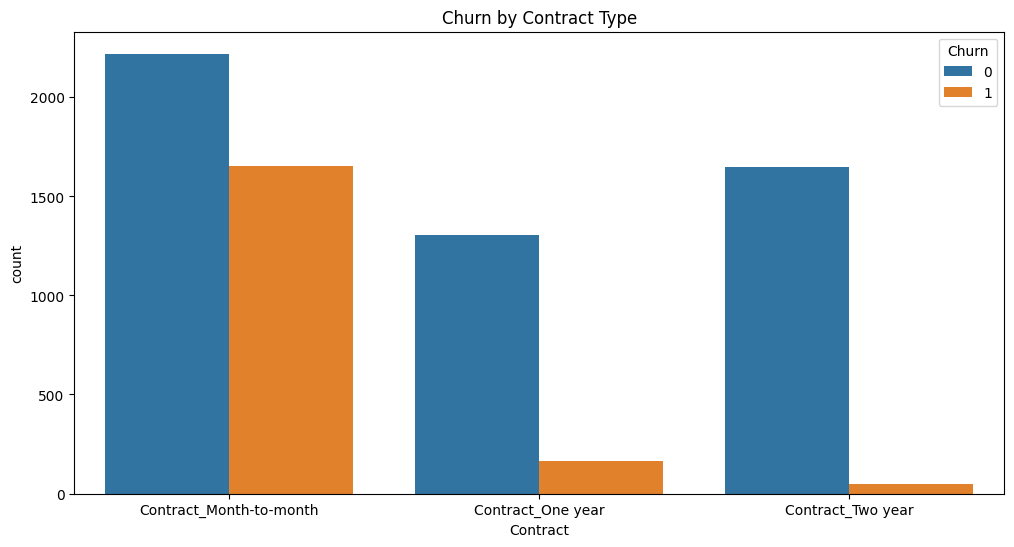

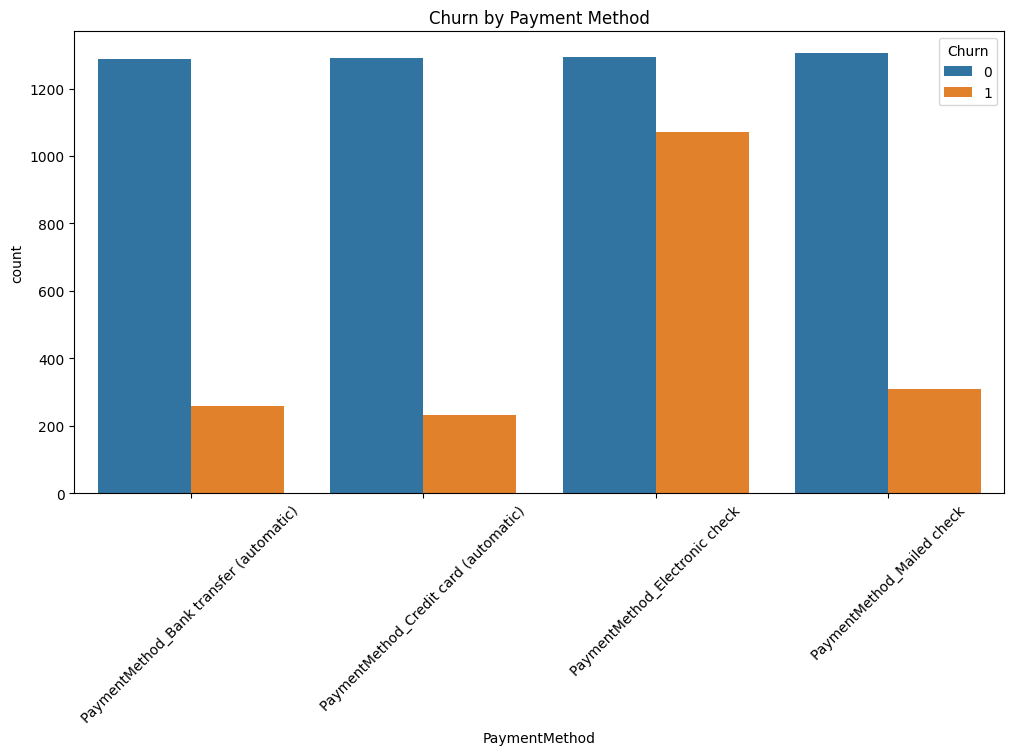

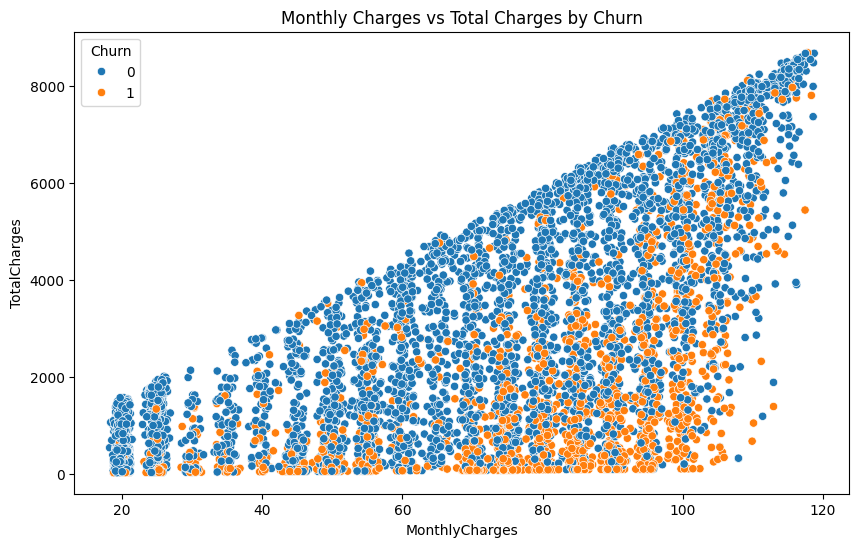

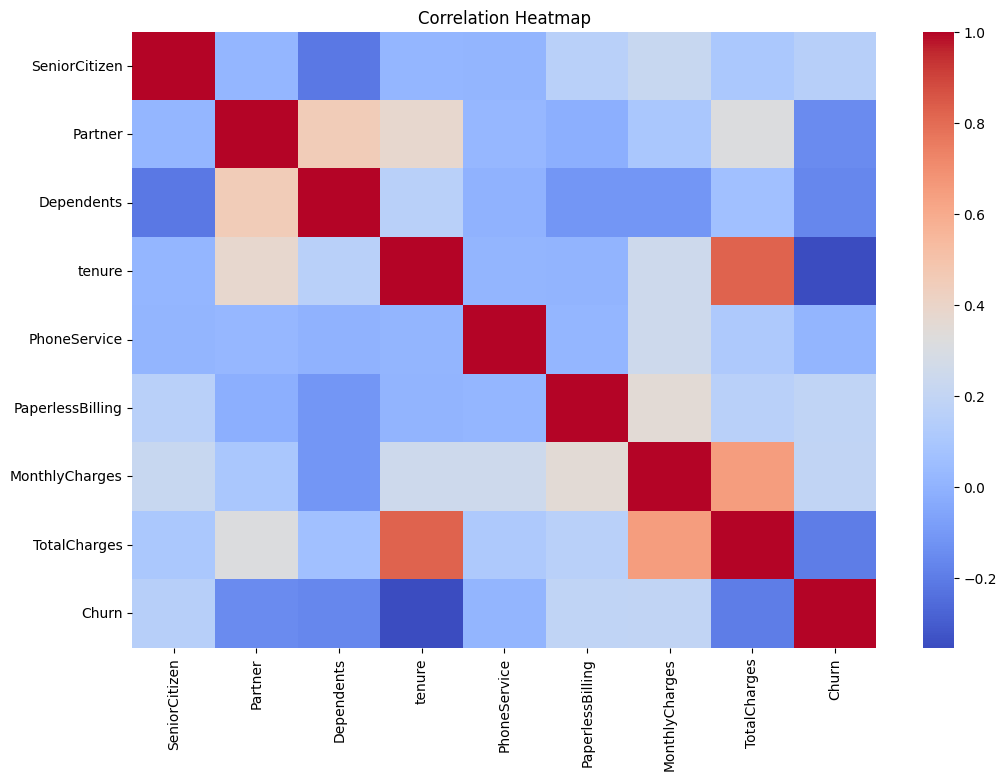

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset from a reliable source
url = 'https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv'
data = pd.read_csv(url)

# Step 1: Data Cleaning and Preprocessing
print("Dataset Info:")
print(data.info())

print("\nFirst 5 Rows of the Dataset:")
print(data.head())

# Handling missing values
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)

# Convert 'SeniorCitizen' column to binary (0 and 1)
data['SeniorCitizen'] = data['SeniorCitizen'].replace({0: 'No', 1: 'Yes'})

# Convert binary categorical variables to 0 and 1
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn', 'SeniorCitizen']
for col in binary_cols:
    data[col] = data[col].replace({'Yes': 1, 'No': 0})

# One-hot encode categorical variables (excluding binary ones)
categorical_cols = data.select_dtypes(include=['object']).columns.difference(['customerID'])
data = pd.get_dummies(data, columns=categorical_cols)

print("\nData after Cleaning and Encoding:")
print(data.head())

# Step 2: Exploratory Data Analysis (EDA)

# Calculate and visualize the overall churn rate
churn_rate = data['Churn'].mean() * 100
print(f"\nOverall Churn Rate: {churn_rate:.2f}%")

plt.figure(figsize=(6, 6))
sns.countplot(x='Churn', data=data)
plt.title("Churn Distribution")
plt.show()

# Explore customer distribution by demographics (Gender and Senior Citizen)
plt.figure(figsize=(12, 6))
sns.countplot(x='gender_Male', hue='Churn', data=data)
plt.title("Churn by Gender")
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='SeniorCitizen', hue='Churn', data=data)
plt.title("Churn by Senior Citizen Status")
plt.show()

# Analyze tenure distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='tenure', hue='Churn', bins=30, kde=True)
plt.title("Distribution of Tenure by Churn")
plt.show()

# Contract type analysis
contract_cols = [col for col in data.columns if 'Contract_' in col]
contract_data = data[contract_cols + ['Churn']].melt(id_vars=['Churn'], var_name='Contract', value_name='Value')

plt.figure(figsize=(12, 6))
sns.countplot(x='Contract', hue='Churn', data=contract_data[contract_data['Value'] == 1])
plt.title("Churn by Contract Type")
plt.show()

# Payment method analysis
payment_cols = [col for col in data.columns if 'PaymentMethod_' in col]
payment_data = data[payment_cols + ['Churn']].melt(id_vars=['Churn'], var_name='PaymentMethod', value_name='Value')

plt.figure(figsize=(12, 6))
sns.countplot(x='PaymentMethod', hue='Churn', data=payment_data[payment_data['Value'] == 1])
plt.title("Churn by Payment Method")
plt.xticks(rotation=45)
plt.show()

# Analyze Monthly Charges vs. Total Charges
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', hue='Churn', data=data)
plt.title("Monthly Charges vs Total Charges by Churn")
plt.show()

# Remove non-numeric columns before correlation
numeric_data = data.select_dtypes(include=[np.number])

# Correlation heatmap
plt.figure(figsize=(12, 8))
corr = numeric_data.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()